In [90]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import calendar



In [59]:
df = pd.read_csv ('Dataset//uk_accident_data.csv')


In [60]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True)
df['year'] = df['Accident Date'].dt.year
df['month'] = df['Accident Date'].dt.month
df['day'] = df['Accident Date'].dt.day

In [61]:
df


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,year,month,day
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,2019,8,26
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23


<h1>1. Correlation between vehicles and casualties</h1>

In [62]:
df[['Number_of_Vehicles','Number_of_Casualties']].corr()


,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h1>Insight shows accidents with more vehicles tend to have slightly more casualties.</h1>

<h1>2.What is the Average casualties per district</h1>

In [63]:
 df.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False).head()

District Area
Blaeu Gwent          1.693694
West Somerset        1.613990
Derwentside          1.606186
Chester-le-Street    1.603306
Durham               1.580431
Name: Number_of_Casualties, dtype: float64

<h1> Insight shows some districts report higher average casualties than others.</h1>

<h1>3. Which district has the highest average casualties per accident?</h1>

In [64]:
df.groupby('District Area')['Number_of_Casualties'].mean().idxmax()


'Blaeu Gwent'

<h1>Insights shows its blaeu gwent</h1>

<h1>4.What are the Accident severity counts by road surface</h1>

In [65]:
df.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts()


Road_Surface_Conditions  Accident_Severity
Dry                      Slight               380395
                         Serious               61638
                         Fatal                  5788
Flood over 3cm. deep     Slight                  842
                         Serious                 152
                         Fatal                    23
Frost or ice             Slight                16317
                         Serious                2007
                         Fatal                   193
Snow                     Slight                 5290
                         Serious                 565
                         Fatal                    35
Wet or damp              Slight               160303
                         Serious               23785
                         Fatal                  2620
Name: count, dtype: int64

<h1> Insight shows dry roads still account for the majority of accidents.</h1>

<h1>5. What percentage of accidents were Fatal?</h1>

In [66]:
(df['Accident_Severity'].value_counts(normalize=True) * 100).round(2)


Accident_Severity
Slight     85.34
Serious    13.35
Fatal       1.31
Name: proportion, dtype: float64

<h1>Insights shows its 1.30 or sumthing</h1>

<h1>6. Which district has the most accidents recorded?</h1>

In [67]:
df['District Area'].value_counts().idxmax()


'Birmingham'

<H1>i dont know about you but i can clearly see the insight in here</H1>

<h1>7. How many accidents occurred during Daylight vs Darkness?</h1>

In [68]:
df['Light_Conditions'].value_counts()


Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1>Insights shows the stark difference between day and night accidnets</h1>

<h1>8. What’s the most common weather condition during accidents?</h1>

In [69]:
df['Weather_Conditions'].mode()[0]


'Fine no high winds'

<h1>Insights shows that people get complecent and get into more accidnets if the weather is good</h1>

<H1>9. How many accidents occurred in Urban vs Rural areas?</H1>

In [70]:
df['Urban_or_Rural_Area'].value_counts()


Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

<H1>Insights shows that urban areas have more accidents</H1>

<h1>10. What is the maximum number of vehicles involved in a single accident?</h1>

In [71]:
df['Number_of_Vehicles'].max()


np.int64(32)

<h1>11. Do urban or rural areas have higher casualties per accident?</h1>

In [72]:
df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()


Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287815
Name: Number_of_Casualties, dtype: float64

<h1>Insights shows that yes it is</h1>
<h4> i know the question looks the same as 9 but pls gib me credit theres only so muhc question i can think of at night :<</h4>

<h1>12 What’s the most dangerous vehicle type in terms of average casualties per accident?</h1>

In [73]:
df.groupby('Vehicle_Type')['Number_of_Casualties'].mean().sort_values(ascending=False).head(5)


Vehicle_Type
Data missing or out of range       1.500000
Pedal cycle                        1.370558
Taxi/Private hire car              1.368663
Goods over 3.5t. and under 7.5t    1.362861
Motorcycle over 500cc              1.359434
Name: Number_of_Casualties, dtype: float64

<h1>Insights shows its......idk???? its not showing it says it cant show </h1>

<h1>13.What is the Monthly accidents under wet roads</h1>

In [74]:
df[df['Road_Surface_Conditions']=='Wet'].groupby(df['month']).size()


Series([], dtype: int64)

<h1>Insight shows wet road accidents are frequent i guess.</h1>

<h1>14. what are the average casualties for daylight vs darkness?</h1>

In [75]:
df[df['Accident_Severity']=='Serious'].groupby('Light_Conditions')['Number_of_Casualties'].mean()


Light_Conditions
Darkness - lighting unknown    1.433249
Darkness - lights lit          1.455672
Darkness - lights unlit        1.438889
Darkness - no lighting         1.799972
Daylight                       1.432265
Name: Number_of_Casualties, dtype: float64

<h1>iInsight shows serious accidents in darkness often cause slightly more casualties.</h1>


<h1>15. Which is the safest month?</h1>

In [76]:
df.groupby('month')['Number_of_Casualties'].mean().idxmax()


np.int32(8)

<h1> Insights shows that I think its August because it says "8'</h1>

<h1>16. What is the average number of casualties per accident?</h1>

In [77]:
df['Number_of_Casualties'].mean().round(2)


np.float64(1.36)

<h1>insiights shows that its around 1.36</h1>

<h1>17. What is the correlation between the number of casualties and the number of vehicles involved in accidents?</h1>

In [78]:
df['Number_of_Casualties'].corr(df['Number_of_Vehicles'])


np.float64(0.22888886126927563)

<h1>insights shows more vehicles usually mean more casualties, but not very strongly.</h1>

<h1>18. What is the correlation between latitude and longitude?</h1>

In [79]:
df['Latitude'].corr(df['Longitude'])


np.float64(-0.3981136594753893)


<h1> insights as latitude increases, longitude tends to decrease </h1>

<h1>19. What is the correlation between latitude and the number of casualties?</h1>

In [80]:
df['Latitude'].corr(df['Number_of_Casualties'])


np.float64(0.032200913378368654)

<h1>insights shows its weak meanign it has almost no correlation with the amount of casualties </h1>

<h1>20. What is the correlation between longitude and the number of casualties?</h1>

In [81]:
df['Longitude'].corr(df['Number_of_Casualties'])


np.float64(-0.04040593604880228)

<h1>insights shows its the same with lattitude meanign it has almost no correlation</h1>

<h1>Its visual time hehehe</h1>

<h1>21.Which district has the highest average casualties?</h1>

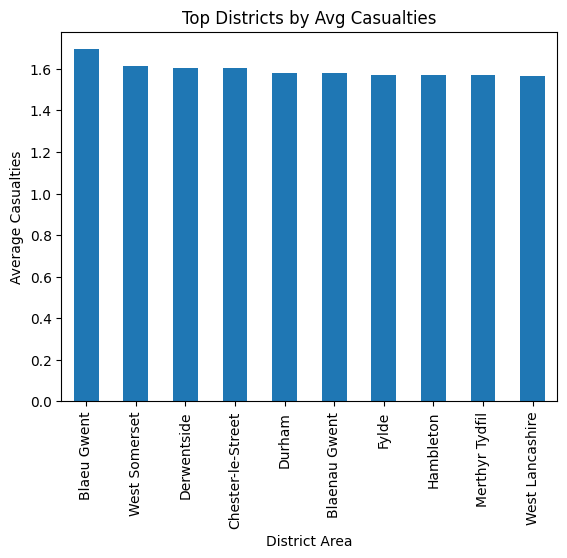

In [82]:
df.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Districts by Avg Casualties")
plt.ylabel("Average Casualties")
plt.show()


<h1>Insight shows certain districts have higher average casualties.</h1>

<h1>22.What is the average number of vehicles by severity?</h1>

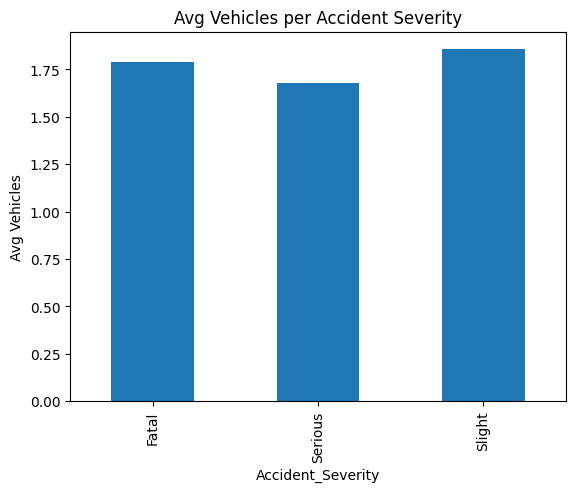

In [83]:
df.groupby('Accident_Severity')['Number_of_Vehicles'].mean().plot(kind='bar')
plt.title("Avg Vehicles per Accident Severity")
plt.ylabel("Avg Vehicles")
plt.show()


<h1>Insight shows serious/fatal accidents often involve more vehicles.</h1>

<h1>23.Which districts have the most fatal accidents?</h1>

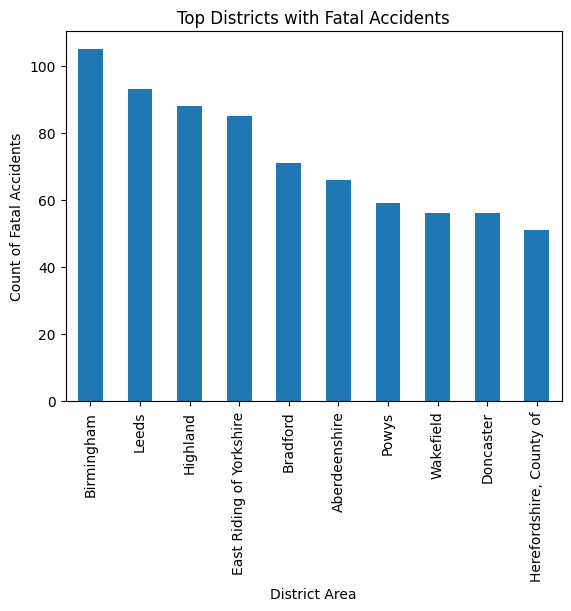

In [84]:
df[df['Accident_Severity']=='Fatal'].groupby('District Area').size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Districts with Fatal Accidents")
plt.ylabel("Count of Fatal Accidents")
plt.show()


<h1> nsight shows only a few districts have fatal accident counts.</h1>

<h1>24.What is the distribution of accidents for different months of the year?</h1>

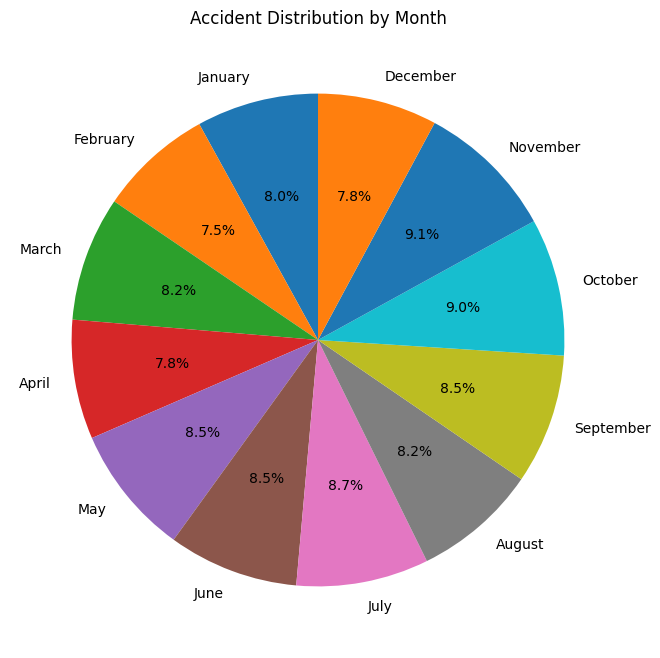

In [91]:
monthly_counts = df.groupby('month').size()
month_names = [calendar.month_name[m] for m in monthly_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(monthly_counts, labels=month_names, autopct='%1.1f%%', startangle=90)
plt.title('Accident Distribution by Month')
plt.show()

<h1> Insights shows that accidents are of course  not evenly distributed throughout the year.</h1>

<h1>25.How does the average number of casualties per accident vary by month?</h1>

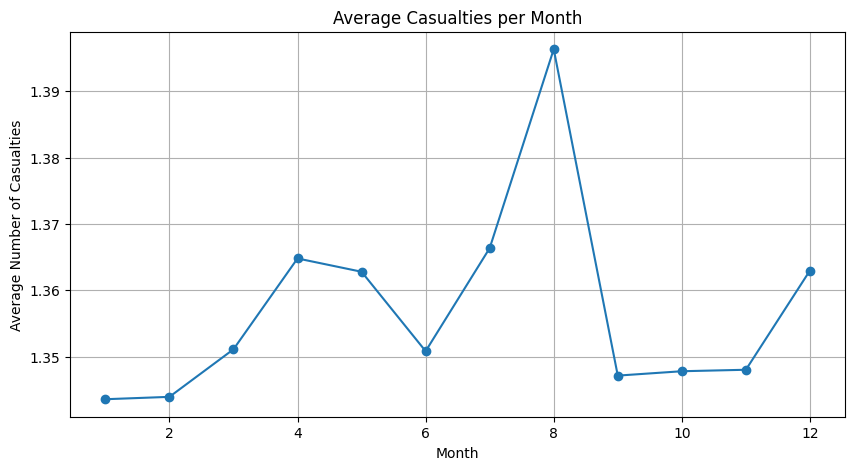

In [85]:
monthly_avg_casualties = df.groupby('month')['Number_of_Casualties'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_casualties.index, monthly_avg_casualties.values, marker='o', linestyle='-')
plt.title('Average Casualties per Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Casualties')
plt.grid(True)
plt.show()

<h1>nsight shows that average casualties per accident peak in specific months (december) i think</h1>

<h2>IM FINALLY DONE...........or so I thought</h2>

<h1>26.Which road type (single carriageway, dual carriageway, etc.) has the highest number of serious accidents?</h1>

In [92]:
df[df['Accident_Severity'] == 'Serious'].groupby('Road_Type').size().sort_values(ascending=False)

Road_Type
Single carriageway    70059
Dual carriageway      11746
Roundabout             3665
One way street         1655
Slip road               611
dtype: int64

<h1>Insights shows its single carriegeway by a lot too </h1>

<H1>27.How do different weather conditions affect the number of casualties?</H1>

In [94]:
df.groupby('Weather_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False)

Weather_Conditions
Fog or mist              1.452948
Snowing + high winds     1.418079
Raining + high winds     1.416641
Raining no high winds    1.408214
Fine + high winds        1.386018
Other                    1.354869
Fine no high winds       1.350480
Snowing no high winds    1.341776
Name: Number_of_Casualties, dtype: float64

<h1>insights shows that casualties increase in wet or snowy weather compared to clear conditions which is obvious</h1>

<H1>28.Which vehicle types are most often involved in accidents with multiple casualties?</H1>

In [95]:
df.groupby('Vehicle_Type')['Number_of_Casualties'].mean().sort_values(ascending=False)


Vehicle_Type
Data missing or out of range             1.500000
Pedal cycle                              1.370558
Taxi/Private hire car                    1.368663
Goods over 3.5t. and under 7.5t          1.362861
Motorcycle over 500cc                    1.359434
Car                                      1.358841
Van / Goods 3.5 tonnes mgw or under      1.354537
Goods 7.5 tonnes mgw and over            1.351881
Bus or coach (17 or more pass seats)     1.349216
Minibus (8 - 16 passenger seats)         1.345648
Motorcycle over 125cc and up to 500cc    1.343521
Agricultural vehicle                     1.342065
Other vehicle                            1.340075
Motorcycle 50cc and under                1.337235
Motorcycle 125cc and under               1.332635
Ridden horse                             1.250000
Name: Number_of_Casualties, dtype: float64

<h1>insights shows that Cars cause most accidents, talk about kamotes</h1>

<H1>29.Are accidents in darkness (with/without lights) more likely to be fatal/serious compared to daylight crashes?</H1>

In [97]:
df.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


<h1>insights shows that darkness increases accident severity compared to daylight.</h1>

<H1>30.Is there a relationship between the number of vehicles involved and the number of casualties?</H1>

In [98]:
df.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()


Number_of_Vehicles
1      1.170932
2      1.374880
3      1.711169
4      1.995575
5      2.315341
6      2.612137
7      3.064189
8      3.401361
9      3.350877
10     3.629630
11     4.000000
12     2.285714
13     7.833333
14     5.444444
15     5.000000
16     6.000000
19    13.000000
28    16.000000
32     5.000000
Name: Number_of_Casualties, dtype: float64

<h1> More vehicles involved usually means higher casualties obviously</h1>

<H1>31.Do slippery road surfaces (wet, icy) lead to more serious accidents?</H1>

In [99]:
df.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)


Accident_Severity,Fatal,Serious,Slight
Road_Surface_Conditions,,,
Dry,5788,61638,380395
Flood over 3cm. deep,23,152,842
Frost or ice,193,2007,16317
Snow,35,565,5290
Wet or damp,2620,23785,160303


<h1>insights shows that of course it does</h1>